In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train=pd.read_csv('titanic_train.csv')

In [18]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


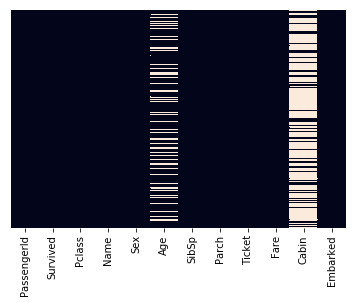

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False) #to understand where the null data lies

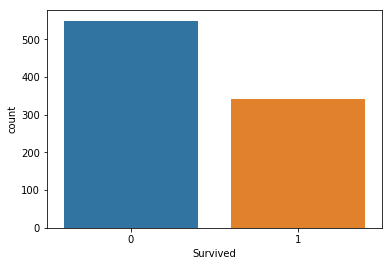

In [11]:
sns.countplot(x='Survived', data = train)

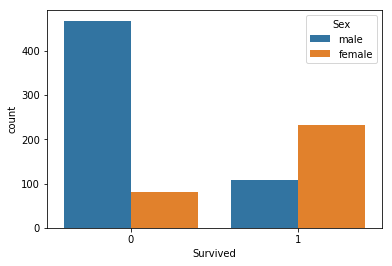

In [12]:
sns.countplot(x='Survived', hue = 'Sex', data = train)

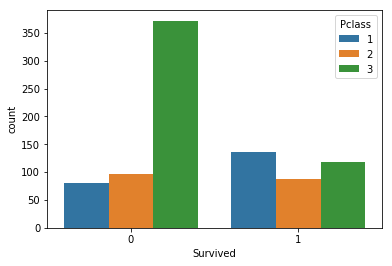

In [15]:
sns.countplot(x='Survived', hue = 'Pclass', data = train)

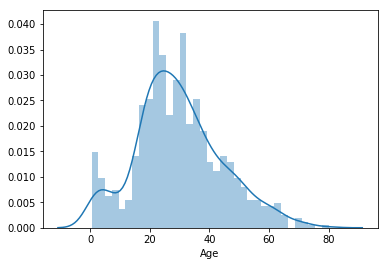

In [17]:
sns.distplot(train['Age'].dropna(),bins=35)

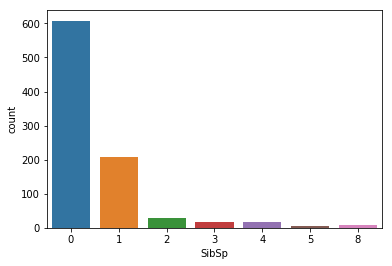

In [20]:
sns.countplot(x='SibSp',data=train)

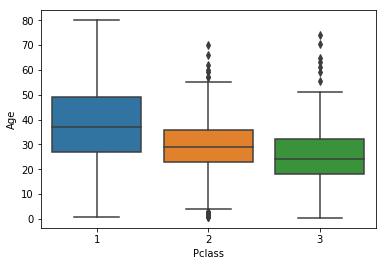

In [21]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [24]:
#to fill in the null ages w.r.t. Pclass
def impute(x):
    a=x[0]
    p=x[1]
    
    if pd.isnull(a):
        if p==1:
            return 38
        elif p==2:
            return 30
        else:
            return 24
        
    else:
        return a

In [26]:
train['Age']=train[['Age','Pclass']].apply(impute,axis=1)

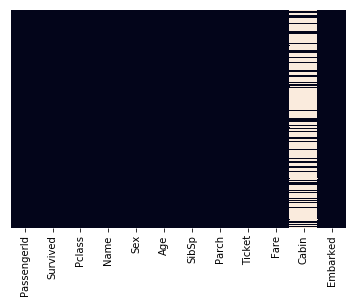

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [28]:
train.drop('Cabin',axis=1,inplace=True)

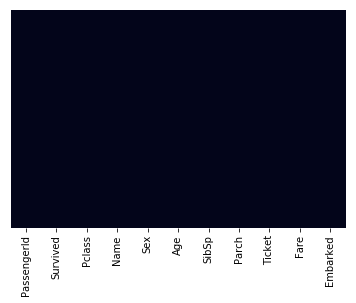

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [33]:
#missing values are dealt with

In [34]:
train.dropna(inplace=True)  #drop any other ROW which has any missing value since such loss of data is negligible

In [44]:
sex = pd.get_dummies(train['Sex'],drop_first=True)#to avoid multi collinearity
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [45]:
emb=pd.get_dummies(train['Embarked'],drop_first=True)
emb.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [58]:
train = pd.concat([train,sex,emb],axis=1)
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [56]:
#dropping unwanted columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [59]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [60]:
train.tail()

PassengerId  Survived  Pclass   Age  SibSp  Parch   Fare  male  Q  S
886          887         0       2  27.0      0      0  13.00     1  0  1
887          888         1       1  19.0      0      0  30.00     0  0  1
888          889         0       3  24.0      1      2  23.45     0  0  1
889          890         1       1  26.0      0      0  30.00     1  0  0
890          891         0       3  32.0      0      0   7.75     1  1  0

In [62]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [64]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1
3         1       1  35.0      1      0  53.1000     0  0  1
4         0       3  35.0      0      0   8.0500     1  0  1

In [65]:
train.tail()

Survived  Pclass   Age  SibSp  Parch   Fare  male  Q  S
886         0       2  27.0      0      0  13.00     1  0  1
887         1       1  19.0      0      0  30.00     0  0  1
888         0       3  24.0      1      2  23.45     0  0  1
889         1       1  26.0      0      0  30.00     1  0  0
890         0       3  32.0      0      0   7.75     1  1  0

In [66]:
X = train.drop('Survived',axis=1)
y = train['Survived']
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()

In [70]:
LRmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predictions = LRmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions)) #to check prediction accuracy

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       184
          1       0.76      0.71      0.73       110

avg / total       0.80      0.81      0.80       294



In [77]:
from sklearn.metrics import confusion_matrix #to check accuracy using confusion metrics
confusion_matrix(y_test,predictions)

array([[159,  25],
       [ 32,  78]], dtype=int64)